In [1]:
import  numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Reading Dataset

In [2]:
# reading data
data=pd.read_csv('wine.csv')

In [3]:
data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
data.shape

(178, 13)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [6]:
data.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

In [7]:
#Feature Scaling
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
data_scaled=scaler.fit_transform(data)
data_scaled

array([[0.84210526, 0.1916996 , 0.57219251, ..., 0.45528455, 0.97069597,
        0.56134094],
       [0.57105263, 0.2055336 , 0.4171123 , ..., 0.46341463, 0.78021978,
        0.55064194],
       [0.56052632, 0.3201581 , 0.70053476, ..., 0.44715447, 0.6959707 ,
        0.64693295],
       ...,
       [0.58947368, 0.69960474, 0.48128342, ..., 0.08943089, 0.10622711,
        0.39728959],
       [0.56315789, 0.36561265, 0.54010695, ..., 0.09756098, 0.12820513,
        0.40085592],
       [0.81578947, 0.66403162, 0.73796791, ..., 0.10569106, 0.12087912,
        0.20114123]])

# K Means clustering

In [9]:
import warnings
warnings.filterwarnings('ignore')
#K-Mean Cluster
from sklearn.cluster import KMeans
wcss=[]
for i in range (1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_) 

# finding out the optimal number of clusters

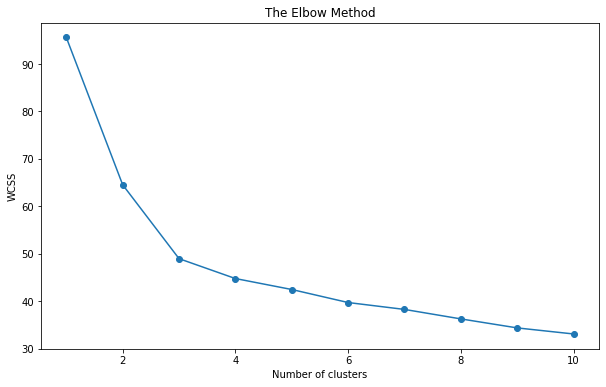

In [10]:
plt.figure(figsize=(10,6))
plt.plot(range(1,11),wcss, marker = 'o')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

we would choose 3 clusters as optimal no

In [11]:
kmeans=KMeans(n_clusters=3,init='k-means++',random_state=42)
y_kmeans=kmeans.fit_predict(data_scaled)
type(data_scaled)
y_kmeans

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [12]:
data['KMean_ClusterID']= pd.Series(kmeans.labels_)
data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,KMean_ClusterID
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,2
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,2
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,2
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,2
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,2


# Creating model

In [14]:
#since there is 11 columns, moved to dimensionality reduction
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
reduced_data=pd.DataFrame(pca.fit_transform(data_scaled),columns=['PC1','PC2'])

In [15]:
reduced_data

,PC1,PC2
0,-0.706336,-0.253193
1,-0.484977,-0.008823
2,-0.521172,-0.189187
3,-0.821644,-0.580906
4,-0.202546,-0.059467
...,...,...
173,0.739510,-0.471901
174,0.581781,-0.348366
175,0.626313,-0.546857
176,0.572991,-0.425516


In [21]:
reduced_data['clusters']=data['KMean_ClusterID']
reduced_data

,PC1,PC2,clusters
0,-0.706336,-0.253193,2
1,-0.484977,-0.008823,2
2,-0.521172,-0.189187,2
3,-0.821644,-0.580906,2
4,-0.202546,-0.059467,2
...,...,...,...
173,0.739510,-0.471901,1
174,0.581781,-0.348366,1
175,0.626313,-0.546857,1
176,0.572991,-0.425516,1


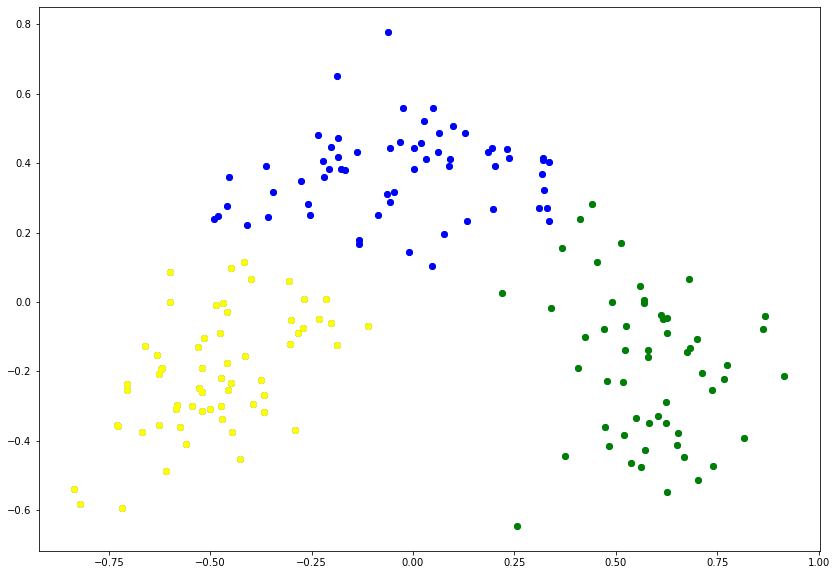

In [24]:
# visualising clusters
plt.figure(figsize=(14,10))
plt.scatter(reduced_data['PC1'],reduced_data['PC2'])
plt.scatter(reduced_data[reduced_data['clusters']==0].loc[:,'PC1'],reduced_data[reduced_data['clusters']==0].loc[:,'PC2'],color='blue')
plt.scatter(reduced_data[reduced_data['clusters']==1].loc[:,'PC1'],reduced_data[reduced_data['clusters']==1].loc[:,'PC2'],color='green')
plt.scatter(reduced_data[reduced_data['clusters']==2].loc[:,'PC1'],reduced_data[reduced_data['clusters']==2].loc[:,'PC2'],color='yellow')
plt.show()

# Hierarchial clustering

# finding out the optimal number of clusters

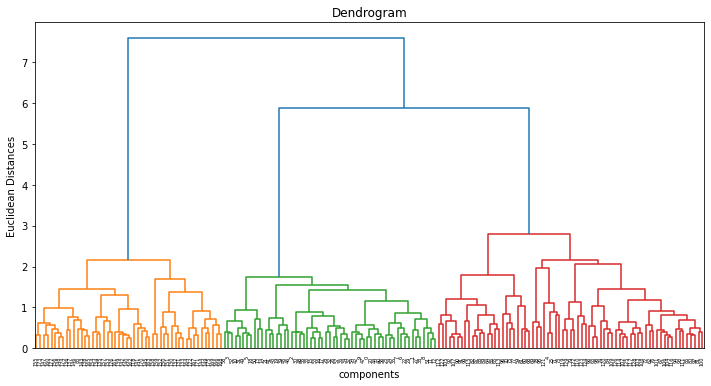

In [25]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(12,6))
dendrogram=sch.dendrogram(sch.linkage(data_scaled,method='ward'))
plt.title('Dendrogram')
plt.xlabel('components')
plt.ylabel('Euclidean Distances')
plt.show()

We could see 3 clusters fom the above dendogram

In [26]:
from sklearn.cluster import AgglomerativeClustering
hc=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')
y_hc=hc.fit_predict(data_scaled)
y_hc

array([2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int64)

# Creating model

In [28]:
reduced_data['H_ClusterID'] = y_hc

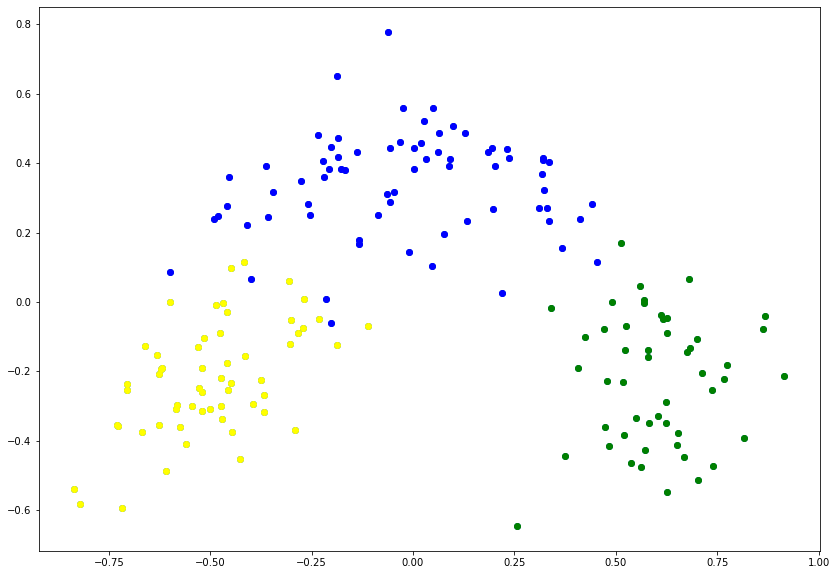

In [29]:
# visualising clusters
plt.figure(figsize=(14,10))
plt.scatter(reduced_data['PC1'],reduced_data['PC2'])
plt.scatter(reduced_data[reduced_data['H_ClusterID']==0].loc[:,'PC1'],reduced_data[reduced_data['H_ClusterID']==0].loc[:,'PC2'],color='blue')
plt.scatter(reduced_data[reduced_data['H_ClusterID']==1].loc[:,'PC1'],reduced_data[reduced_data['H_ClusterID']==1].loc[:,'PC2'],color='green')
plt.scatter(reduced_data[reduced_data['H_ClusterID']==2].loc[:,'PC1'],reduced_data[reduced_data['H_ClusterID']==2].loc[:,'PC2'],color='yellow')
plt.show()